In [94]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
x_train_all= pd.read_csv("train-data.csv", header= None)
#x_train= x_train.values

y_train_all= pd.read_csv("train-target.csv", header= None )
#y_train= y_train.values

x_test= pd.read_csv("test-data.csv", header= None)
x_test= x_test.values

y_test= pd.read_csv("test-target.csv", header= None)
y_test=y_test.values

In [97]:
# Train - Validation data split
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
x_train = x_train.values
y_train = y_train.values
x_val = x_val.values
y_val = y_val.values

(33376, 128) (33376, 1)
(10431, 128) (10431, 1)


In [98]:
def display_x_train(num):
    
    x = x_train[num:num+1].reshape(16,8)
    plt.gray()
    plt.matshow(1.0 - x) # 1.0 - x simply inverts the fading direction of the image
    plt.show()
    print(x_train[num:num+1])
    
#display_x_train(2) 

In [99]:
y = y_train
y

array([['t'],
       ['o'],
       ['g'],
       ...,
       ['n'],
       ['m'],
       ['e']], dtype=object)

In [100]:
y[:,0]

array(['t', 'o', 'g', ..., 'n', 'm', 'e'], dtype=object)

In [101]:
y[2,0]

'g'

In [102]:
#changing the alphabet to numbers

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoder_y= LabelEncoder()
y= label_encoder_y.fit_transform(y)
y



array([19, 14,  6, ..., 13, 12,  4])

In [103]:
y.shape

(33376,)

In [104]:
#onehotencoder = OneHotEncoder(categorical_features=[0])

 
y_train_onehot=np.eye(26)[y]
y_train_onehot.shape


(33376, 26)

In [105]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
y3= label_encoder_y.fit_transform(y_val)
y_val_onehot=np.eye(26)[y3]
y_val_onehot.shape

(8345, 26)

In [107]:
y_test.shape

(10431, 1)

In [108]:
y2= label_encoder_y.fit_transform(y_test)
y2

array([ 6,  6, 13, ...,  8, 14, 13])

In [109]:
y_test_onehot=np.eye(26)[y2]
y_test_onehot.shape

(10431, 26)

In [110]:
y_test_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
x = tf.placeholder(tf.float32, [None, 128])

In [112]:
W = tf.Variable(tf.zeros([128, 26]))
b = tf.Variable(tf.zeros([26]))

W

<tf.Variable 'Variable_30:0' shape=(128, 26) dtype=float32_ref>

In [125]:
y_hat = tf.nn.softmax(tf.matmul(x, W) + b)
y = tf.placeholder(tf.float32, [None, 26])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [126]:
def next_batch3(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [127]:
x_train.shape

(33376, 128)

In [128]:
x_test.shape

(10431, 128)

In [129]:
y_test_onehot.shape

(10431, 26)

In [130]:
y_train_onehot.shape

(33376, 26)

In [131]:
for _ in range(1000):
  batch_xs, batch_ys = next_batch3(100,x_train,y_train_onehot)
  sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})

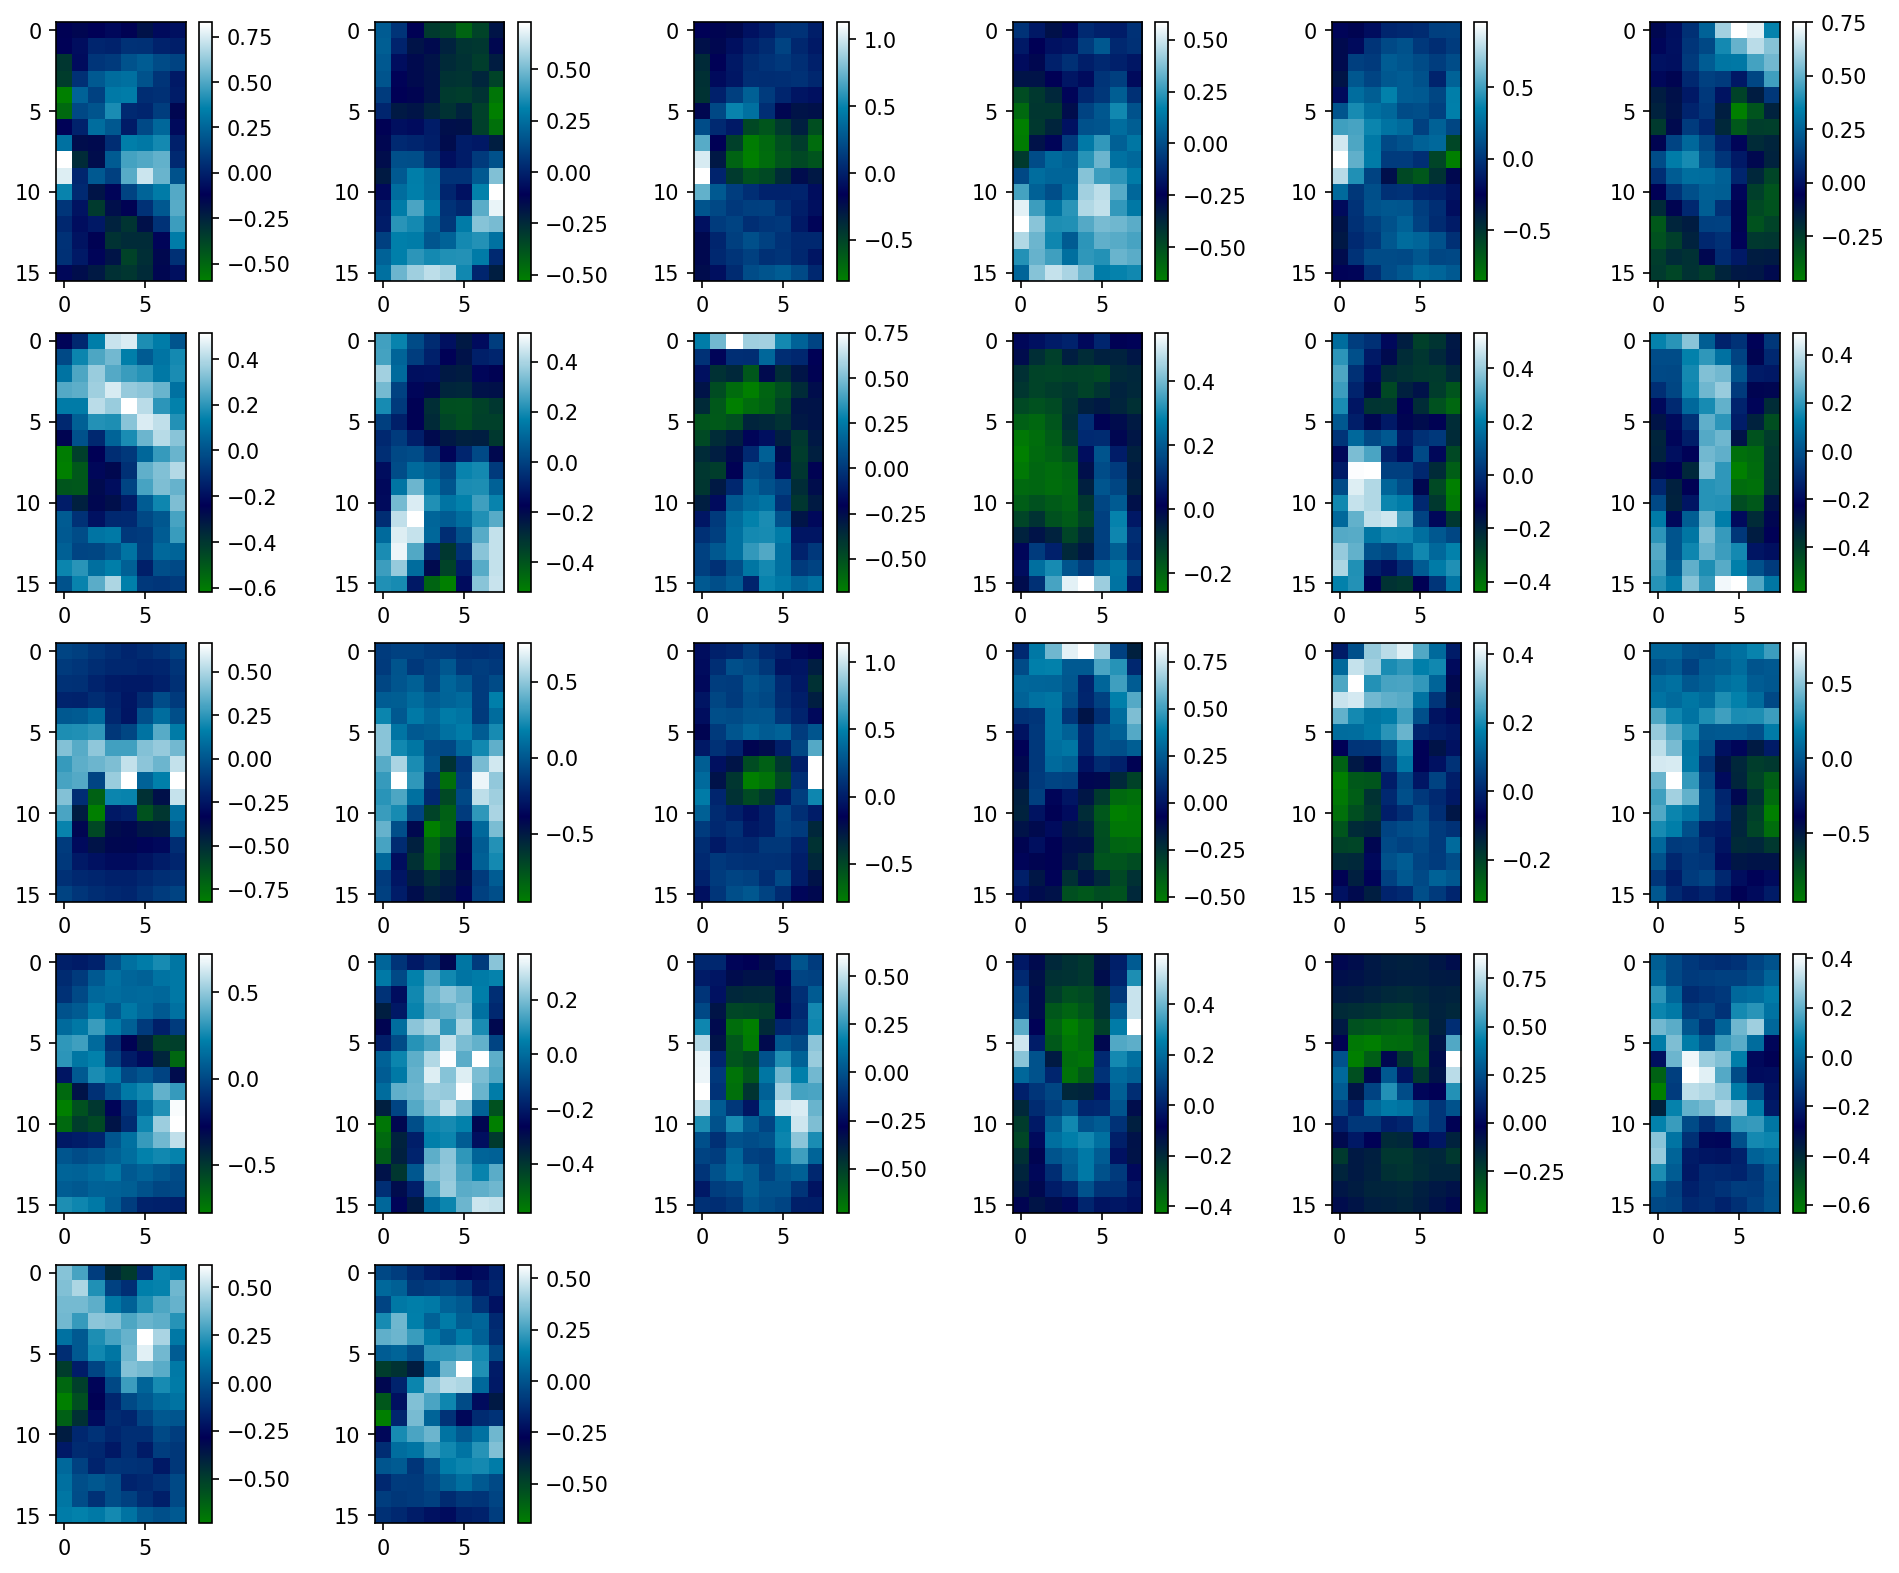

In [132]:
w = W.eval()
fig = plt.figure(figsize=(16, 16), dpi=150)
for digit in range(w.shape[1]):
    ax = fig.add_subplot(6,6,digit+1)
    ax.set_aspect('equal')
    plt.imshow(w.T[digit].reshape(16,8), interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
plt.show()

In [133]:
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))


In [134]:
x_test.shape

(10431, 128)

In [135]:
y_test_onehot.shape

(10431, 26)

In [136]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print(sess.run(accuracy, feed_dict={x: x_test, y: y_test_onehot}))


0.7232288


# Deep architectures

In [148]:
# Initializes a weight variable by sampling from a truncated normal distribution with standard deviation of 0.1
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# Initializes a bias variable with a constant value 0.1
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', use_cudnn_on_gpu=False)

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


W_conv1 = weight_variable([3, 3, 1, 32])
b_conv1 = bias_variable([32])


x_image = tf.reshape(x, [-1, 16, 8, 1])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])


h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = weight_variable([4 * 2 * 64, 512])
b_fc1 = bias_variable([512])


h_pool2_flat = tf.reshape(h_pool2, [-1, 4*2*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


W_fc2 = weight_variable([512, 26])
b_fc2 = bias_variable([26])



y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_hat = tf.nn.softmax(y_conv)


cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

predicted_y = tf.argmax(y_hat, 1)
real_y = tf.argmax(y, 1)
correct_prediction = tf.equal(predicted_y, real_y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [149]:
#training and building a model
sess.run(tf.global_variables_initializer())
for i in range(5000):
    #batch = mnist.train.next_batch(50)
    batch= next_batch3(50,x_train,y_train_onehot)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
        print('step {}, training accuracy {}'.format(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})
# Dividing evaluation in batches for memory constraints


#validation
import numpy as np
accuracy_values = []
predicted_targets = [] # these will not be in one-hot encoding

val_accuracy_values = []
val_predicted_targets = []
for j in range(100):
    #batch = mnist.test.next_batch(100)
    batch= next_batch3(50,x_val,y_val_onehot)
    val_acc, val_pred_y = sess.run([accuracy, predicted_y], feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
    val_accuracy_values.append(val_acc)
    val_predicted_targets.extend(val_pred_y)
    

print('val accuracy {}'.format(np.mean(val_accuracy_values)))



step 0, training accuracy 0.0
step 100, training accuracy 0.2199999988079071
step 200, training accuracy 0.5199999809265137
step 300, training accuracy 0.5199999809265137
step 400, training accuracy 0.5400000214576721
step 500, training accuracy 0.6600000262260437
step 600, training accuracy 0.699999988079071
step 700, training accuracy 0.699999988079071
step 800, training accuracy 0.7799999713897705
step 900, training accuracy 0.7200000286102295
step 1000, training accuracy 0.7799999713897705
step 1100, training accuracy 0.800000011920929
step 1200, training accuracy 0.7599999904632568
step 1300, training accuracy 0.800000011920929
step 1400, training accuracy 0.699999988079071
step 1500, training accuracy 0.7799999713897705
step 1600, training accuracy 0.8399999737739563
step 1700, training accuracy 0.7599999904632568
step 1800, training accuracy 0.7799999713897705
step 1900, training accuracy 0.7799999713897705
step 2000, training accuracy 0.699999988079071
step 2100, training accur

In [150]:
#test accuracy
for j in range(100):
    #batch = mnist.test.next_batch(100)
    batch= next_batch3(50,x_test,y_test_onehot)
    b_acc, b_pred_y = sess.run([accuracy, predicted_y], feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
    accuracy_values.append(b_acc)
    predicted_targets.extend(b_pred_y)
    
    
    

print('test accuracy {}'.format(np.mean(accuracy_values)))

test accuracy 0.8589998483657837


In [248]:
predicted_targets = [] # these will not be in one-hot encoding

for i in range(0, x_test.shape[0],1):
    b_pred_y = sess.run([predicted_y], feed_dict={x: x_test[i:i+1], y: y_test_onehot[i:i+1], keep_prob: 1.0})
    predicted_targets.extend(b_pred_y)


   
    
pd.DataFrame(predicted_targets).to_csv('predictions.csv')

#batch= next_batch3(10450,x_test,y_test_onehot)

#pd.DataFrame(b_pred_y).to_csv('predictions.txt')



